COLOR QUANTIZATION

In [1]:
# for loading/processing the images  
from keras.preprocessing.image import load_img 
from keras.preprocessing.image import img_to_array 
from keras.applications.vgg16 import preprocess_input 

# models 
from keras.applications.vgg16 import VGG16 
from keras.models import Model

# clustering and dimension reduction
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# for everything else
import os
import numpy as np
import matplotlib.pyplot as plt
from random import randint
import pandas as pd
import pickle

In [2]:
path = "C:\\Users\\sakshi\\Desktop\\datasets\\images_compressed"
# change the working directory to the path where the images are located
os.chdir(path)

# this list holds all the image filename
fashion = []

# creates a ScandirIterator aliased as files
with os.scandir(path) as files:
  # loops through each file in the directory
    for file in files:
        fashion.append(file.name)

In [3]:
print(fashion[:10])

['00003aeb-ace5-43bf-9a0c-dc31a03e9cd2.jpg', '00070a23-9faf-4682-8243-59f307880f4b.jpg', '000d31f6-44b5-4758-8d86-c4fcfb234392.jpg', '001068a8-86c3-4029-a9d9-1e27015e7e64.jpg', '00143901-a14c-4600-960f-7747b4a3a8cd.jpg', '00149032-3dd6-426e-9bc0-d53032536a42.jpg', '00208c77-ee58-4b63-bc1a-b9b3aa4f1be0.jpg', '0028956e-9962-46f0-ad45-2c42f8a59d94.jpg', '002e88c2-e0ce-4a4b-9670-eddc3d99accc.jpg', '002eb5b8-6541-42a3-9596-0d94f7b866ae.jpg']


In [4]:
# load the image as a 224x224 array
img = load_img(fashion[0], target_size=(224,224))
# convert from 'PIL.Image.Image' to numpy array
img = np.array(img)

print(img.shape)
(224, 224, 3)

(224, 224, 3)


(224, 224, 3)

In [5]:
reshaped_img = img.reshape(1,224,224,3)
print(reshaped_img.shape)
(1, 224, 224, 3)

(1, 224, 224, 3)


(1, 224, 224, 3)

In [6]:
x = preprocess_input(reshaped_img)

In [7]:
# load model
model = VGG16()
# remove the output layer
model = Model(inputs=model.inputs, outputs=model.layers[-2].output)

In [8]:
# load the model first and pass as an argument
model = VGG16()
model = Model(inputs = model.inputs, outputs = model.layers[-2].output)

def extract_features(file, model):
    # load the image as a 224x224 array
    img = load_img(file, target_size=(224,224))
    # convert from 'PIL.Image.Image' to numpy array
    img = np.array(img) 
    # reshape the data for the model reshape(num_of_samples, dim 1, dim 2, channels)
    reshaped_img = img.reshape(1,224,224,3) 
    # prepare image for model
    imgx = preprocess_input(reshaped_img)
    # get the feature vector
    features = model.predict(imgx, use_multiprocessing=True)
    return features

In [10]:
data = {}
# p = r"C:\Users\sakshi\Desktop\datasets\images_compressed"
i = 0
# loop through each image in the dataset
for clothes in fashion:
    print(i)
    i = i+1
    try:
        feat = extract_features(clothes,model)
        data[clothes] = feat
    except FileNotFoundError:
        print('File not found!!', clothes)
    
    # If any other error occurs, print the file name
    except Exception:
        print('Another Error!!', clothes)
        continue

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [11]:


# get a list of the filenames
filenames = np.array(list(data.keys()))

# get a list of just the features
feat = np.array(list(data.values()))
feat.shape
(210, 1, 4096)

# reshape so that there are 210 samples of 4096 vectors
feat = feat.reshape(-1,4096)
feat.shape
(210, 4096)

# get the unique labels (from the flower_labels.csv)
#df = pd.read_csv("E:\MLCR\Dataset")
#label = df['label'].tolist()
#unique_labels = list(set(label))

(210, 4096)

In [12]:
pca = PCA(n_components=100, random_state=22)
pca.fit(feat)
x = pca.transform(feat)

In [27]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=5756, 
                  n_features=2, 
                  centers=20, 
                  cluster_std=0.5, 
                  shuffle=True, 
                  random_state=0)

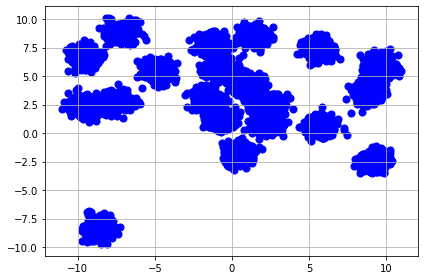

In [28]:
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1], c='blue', marker='o', s=50)
plt.grid()
plt.tight_layout()
plt.show()

# K-MEANS

In [34]:
#-1 SUGGESTS PARALLEL COMPUTING
kmeans = KMeans(n_clusters=20,n_jobs=-1, random_state=22)
kmeans.fit(x)

C:\Users\sakshi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


KMeans(n_clusters=20, n_jobs=-1, random_state=22)

In [35]:
kmeans.labels_

array([11, 19,  1, ...,  8,  8, 14])

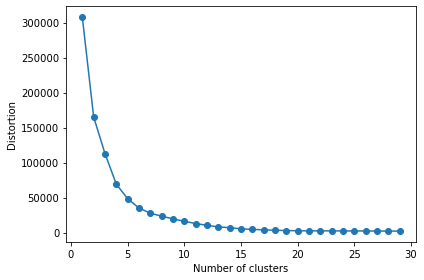

In [31]:
distortions = []
for i in range(1, 30):
    km = KMeans(n_clusters=i, 
                init='k-means++', 
                n_init=10, 
                max_iter=300, 
                random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)
plt.plot(range(1, 30), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()
plt.show()

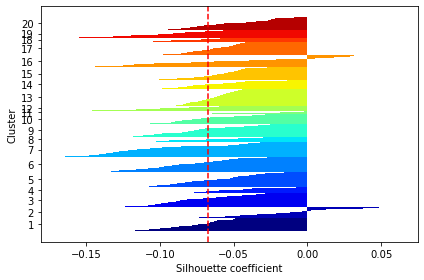

In [47]:
from matplotlib import cm
from sklearn.metrics import silhouette_samples

km = KMeans(n_clusters=20, 
            init='k-means++', 
            n_init=10, 
            max_iter=300,
            tol=1e-04,
            random_state=0)
y_km = km.fit_predict(x)

cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(i / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, 
             edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
    
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--") 

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.tight_layout()
plt.show()

In [15]:
# holds the cluster id and the images { id: [images] }
groups = {}
for file, cluster in zip(filenames,kmeans.labels_):
    if cluster not in groups.keys():
        groups[cluster] = []
        groups[cluster].append(file)
    else:
        groups[cluster].append(file)

In [16]:
def view_cluster(cluster):
    plt.figure(figsize = (25,25));
    # gets the list of filenames for a cluster
    files = groups[cluster]
    # only allow up to 30 images to be shown at a time
    if len(files) > 30:
        print(f"Clipping cluster size from {len(files)} to 30")
        files = files[:29]
    # plot each image in the cluster
    for index, file in enumerate(files):
        plt.subplot(10,10,index+1);
        img = load_img(file)
        img = np.array(img)
        plt.imshow(img)
        plt.axis('off')

Clipping cluster size from 328 to 30


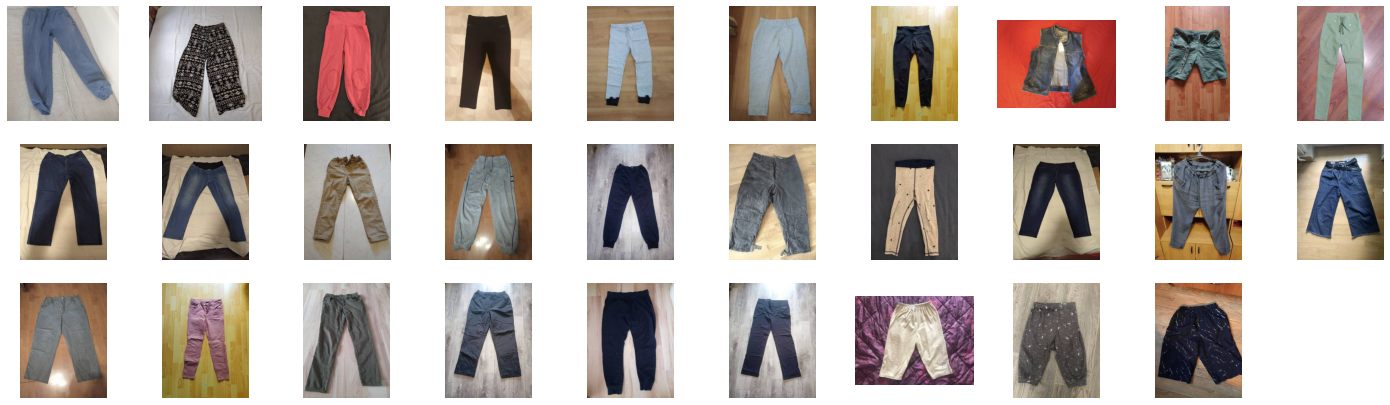

In [22]:
view_cluster(8)

# GAUSSIAN MIXTURE

In [48]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=20)
gmm.fit(x)

#predictions from gmm
labels = gmm.predict(x)

In [49]:
labels

array([ 4, 17, 19, ...,  2,  9,  6], dtype=int64)

In [50]:
# holds the cluster id and the images { id: [images] }
groups = {}
for file, cluster in zip(filenames,labels):
    if cluster not in groups.keys():
        groups[cluster] = []
        groups[cluster].append(file)
    else:
        groups[cluster].append(file)

In [51]:
def view_cluster(cluster):
    plt.figure(figsize = (25,25));
    # gets the list of filenames for a cluster
    files = groups[cluster]
    # only allow up to 30 images to be shown at a time
    if len(files) > 30:
        print(f"Clipping cluster size from {len(files)} to 30")
        files = files[:29]
    # plot each image in the cluster
    for index, file in enumerate(files):
        plt.subplot(10,10,index+1);
        img = load_img(file)
        img = np.array(img)
        plt.imshow(img)
        plt.axis('off')

Clipping cluster size from 249 to 30


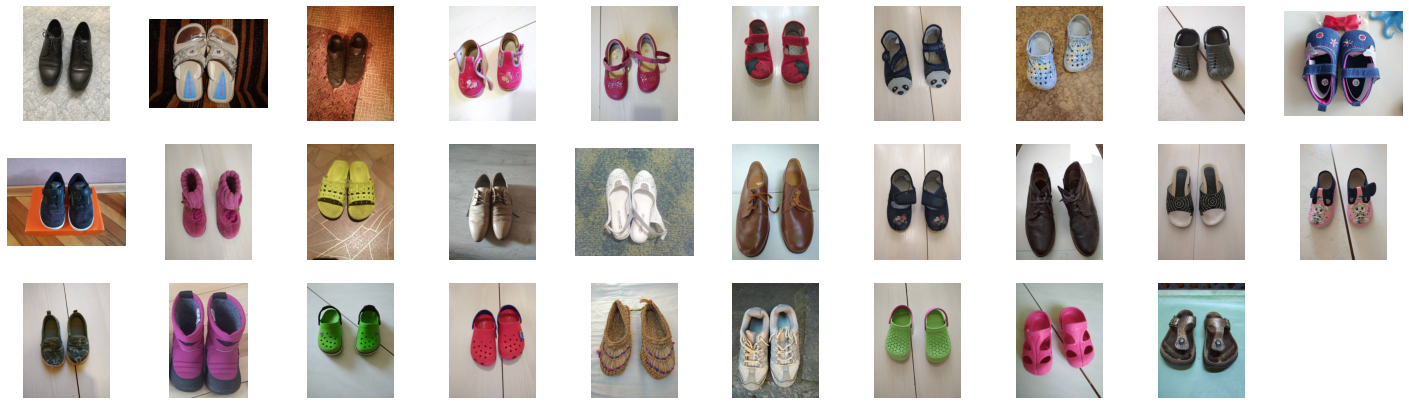

In [52]:
view_cluster(8)

# AGGOLOMERATIVE

In [53]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=20, affinity='euclidean')
model.fit(x)

AgglomerativeClustering(n_clusters=20)

In [54]:
model.labels_

array([ 3,  8, 10, ..., 13, 18,  4], dtype=int64)

In [55]:
# holds the cluster id and the images { id: [images] }
groups = {}
for file, cluster in zip(filenames,model.labels_):
    if cluster not in groups.keys():
        groups[cluster] = []
        groups[cluster].append(file)
    else:
        groups[cluster].append(file)

In [56]:
def view_cluster(cluster):
    plt.figure(figsize = (25,25));
    # gets the list of filenames for a cluster
    files = groups[cluster]
    # only allow up to 30 images to be shown at a time
    if len(files) > 30:
        print(f"Clipping cluster size from {len(files)} to 30")
        files = files[:29]
    # plot each image in the cluster
    for index, file in enumerate(files):
        plt.subplot(10,10,index+1);
        img = load_img(file)
        img = np.array(img)
        plt.imshow(img)
        plt.axis('off')

Clipping cluster size from 192 to 30


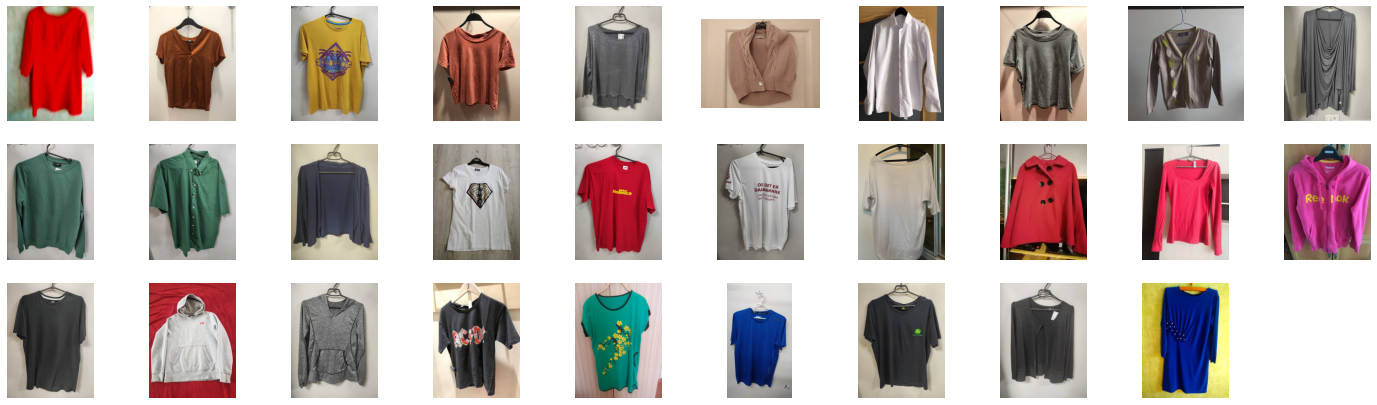

In [59]:
view_cluster(8)